[@LorenaABarba](https://twitter.com/LorenaABarba)

12 steps to Navier–Stokes
=====
***

Did you experiment in Steps [1](./01_Step_1.ipynb) and [2](./02_Step_2.ipynb) using different parameter choices? If you did, you probably ran into some unexpected behavior. Did your solution ever blow up? (In my experience, CFD students *love* to make things blow up.)

You are probably wondering why changing the discretization parameters affects your solution in such a drastic way. This notebook complements our [interactive CFD lessons](https://github.com/barbagroup/CFDPython) by discussing the CFL condition. And learn more by watching Prof. Barba's YouTube lectures (links below). 

Convergence and the CFL Condition
----
***

For the first few steps, we've been using the same general initial and boundary conditions.  With the parameters we initially suggested, the grid has 41 points and the timestep is 0.25 seconds.  Now, we're going to experiment with increasing the size of our grid.  The code below is identical to the code we used in [Step 1](./01_Step_1.ipynb), but here it has been bundled up in a function so that we can easily examine what happens as we adjust just one variable: **the grid size**.

In [2]:
import numpy                 #numpy is a library for array operations akin to MATLAB
from matplotlib import pyplot    #matplotlib is 2D plotting library
%matplotlib inline

def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    #nt is the number of timesteps we want to calculate
    dt = .025  #dt is the amount of time each timestep covers (delta t)
    c = 1

    u = numpy.ones(nx)      #defining a numpy array which is nx elements long with every value equal to 1.
    u[int(.5/dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

    un = numpy.ones(nx) #initializing our placeholder array, un, to hold the values we calculate for the n+1 timestep

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u);

Now let's examine the results of our linear convection problem with an increasingly fine mesh.  

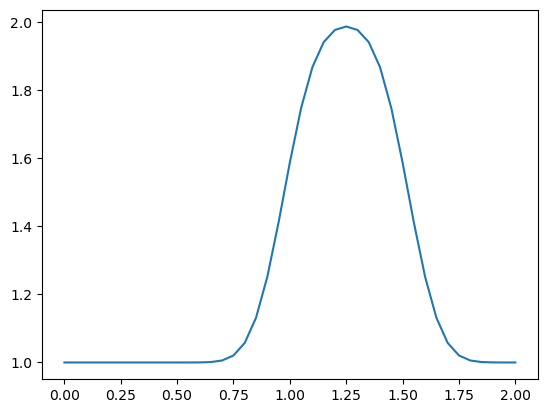

In [3]:
linearconv(41) #convection using 41 grid points

This is the same result as our Step 1 calculation, reproduced here for reference.

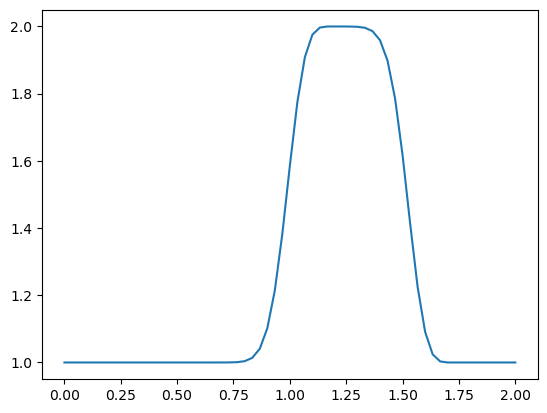

In [4]:
linearconv(61)

Here, there is still numerical diffusion present, but it is less severe.  

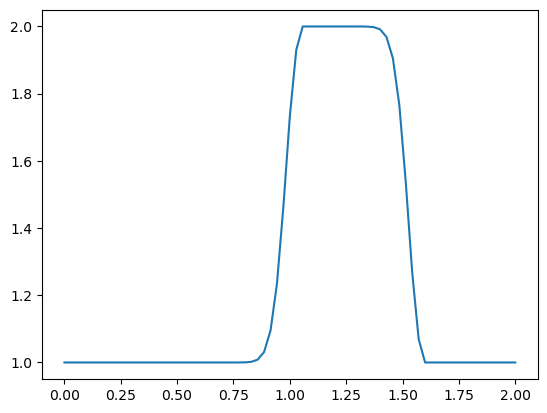

In [5]:
linearconv(71)

Here the same pattern is present -- the wave is more square than in the previous runs.

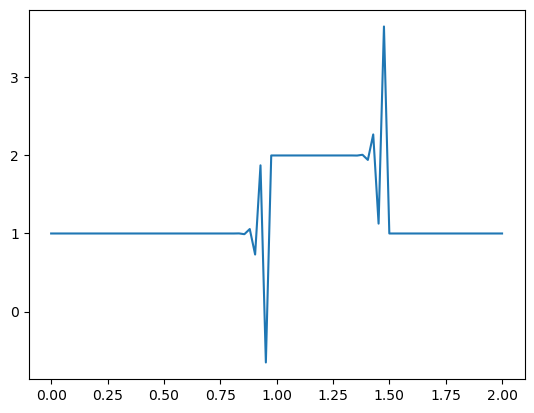

In [6]:
linearconv(85)

This doesn't look anything like our original hat function. 

### What happened?

To answer that question, we have to think a little bit about what we're actually implementing in code.  

In each iteration of our time loop, we use the existing data about our wave to estimate the speed of the wave in the subsequent time step.  Initially, the increase in the number of grid points returned more accurate answers.  There was less numerical diffusion and the square wave looked much more like a square wave than it did in our first example.  

Each iteration of our time loop covers a time-step of length $\Delta t$, which we have been defining as 0.025

During this iteration, we evaluate the speed of the wave at each of the $x$ points we've created.  In the last plot, something has clearly gone wrong.  

What has happened is that over the time period $\Delta t$, the wave is travelling a distance which is greater than `dx`.  The length `dx` of each grid box is related to the number of total points `nx`, so stability can be enforced if the $\Delta t$ step size is calculated with respect to the size of `dx`.  

$$\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{\max}$$

where $u$ is the speed of the wave; $\sigma$ is called the **Courant number** and the value of $\sigma_{\max}$ that will ensure stability depends on the discretization used. 

In a new version of our code, we'll use the CFL number to calculate the appropriate time-step `dt` depending on the size of `dx`.  



In [7]:
import numpy
from matplotlib import pyplot

def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    #nt is the number of timesteps we want to calculate
    c = 1
    sigma = .5
    
    dt = sigma * dx

    u = numpy.ones(nx) 
    u[int(.5/dx):int(1 / dx + 1)] = 2

    un = numpy.ones(nx)

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u)

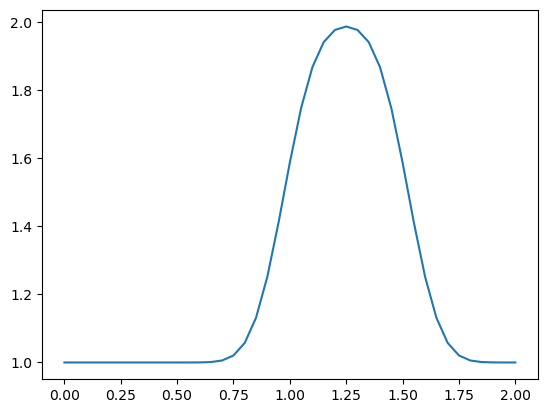

In [8]:
linearconv(41)

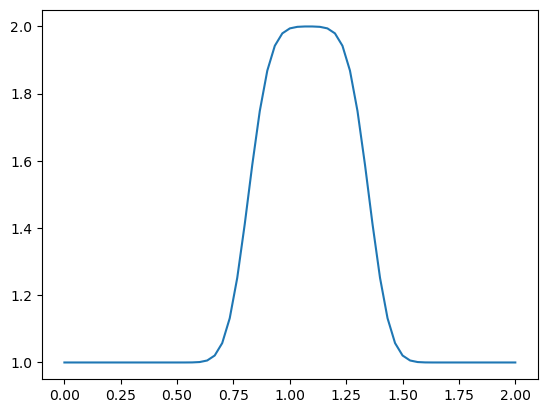

In [9]:
linearconv(61)

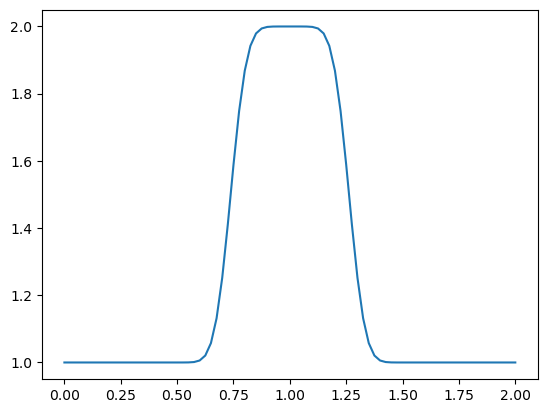

In [10]:
linearconv(81)

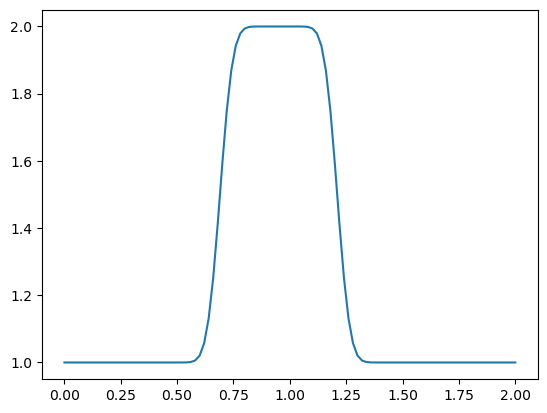

In [11]:
linearconv(101)

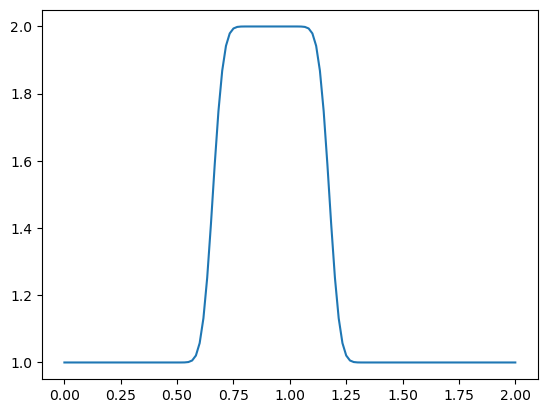

In [12]:
linearconv(121)

Notice that as the number of points `nx` increases, the wave convects a shorter and shorter distance.  The number of time iterations we have advanced the solution at is held constant at `nt = 20`, but depending on the value of `nx` and the corresponding values of `dx` and `dt`, a shorter time window is being examined overall.  

Learn More
-----
***

It's possible to do rigurous analysis of the stability of numerical schemes, in some cases. Watch Prof. Barba's presentation of this topic in **Video Lecture 9** on You Tube.

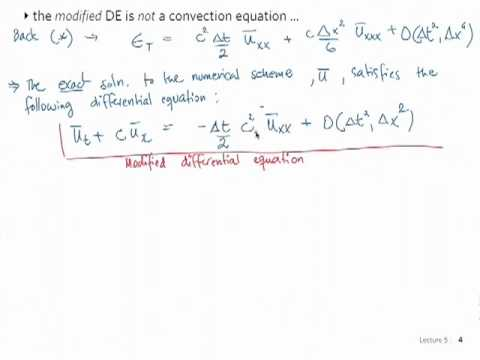

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('Yw1YPBupZxU')

In [13]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()